In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df_latest = pd.read_csv('../data/interim/latest_all_clean.csv').drop(columns='Unnamed: 0')

In [3]:
df_latest.head()

,id,latest.school.name,latest.school.degrees_awarded.predominant,latest.school.degrees_awarded.highest,latest.school.under_investigation,latest.school.main_campus,latest.school.branches,latest.school.ownership,latest.school.state_fips,latest.school.region_id,...,latest.academics.program.degree_or_certificate.public_administration_social_service,latest.academics.program.degree_or_certificate.social_science,latest.academics.program.degree_or_certificate.construction,latest.academics.program.degree_or_certificate.mechanic_repair_technology,latest.academics.program.degree_or_certificate.precision_production,latest.academics.program.degree_or_certificate.transportation,latest.academics.program.degree_or_certificate.visual_performing,latest.academics.program.degree_or_certificate.health,latest.academics.program.degree_or_certificate.business_marketing,latest.academics.program.degree_or_certificate.history
0,100654,Alabama A & M University,3,4,0,1,1,1,1,5,...,1,1,0,0,0,0,1,0,1,0
1,100663,University of Alabama at Birmingham,3,4,0,1,1,1,1,5,...,1,2,0,0,0,0,1,1,1,1
2,100706,University of Alabama in Huntsville,3,4,0,1,1,1,1,5,...,0,1,0,0,0,0,1,1,1,1
3,100724,Alabama State University,3,4,0,1,1,1,1,5,...,1,1,0,0,0,0,1,1,1,1
4,100751,The University of Alabama,3,4,0,1,1,1,1,5,...,1,1,0,0,0,0,1,1,1,1


Do any institutions have missing values for the target variable (completion_rate)? Also, let's rename this column for ease of access. Other columns will retain their names, however, the prefix 'latest' can be removed.

In [4]:
df_latest.columns = df_latest.columns.str.replace(r'latest.','',regex=True)
df_latest = df_latest.rename(columns={'completion.consumer_rate':'completion_rate'})

In [5]:
# Consumer reported completion rate total number of missing values
df_latest['completion_rate'].isna().sum()

64

There are 64 schools that do not have a value for completion rate. Which schools are they? 

In [6]:
pd.set_option('display.max_rows', 70)
df_latest[df_latest['completion_rate'].isna()][['id',
                                                'school.name',
                                                'school.carnegie_basic',
                                                'school.carnegie_undergrad',
                                                'school.accreditor_code']].sort_values(by=['school.carnegie_basic',
                                                                                           'school.carnegie_undergrad'])

,id,school.name,school.carnegie_basic,school.carnegie_undergrad,school.accreditor_code
577,491297,University of Wisconsin-Parkside Flex,-2,-2,NCACHE
579,493725,University of Arkansas System eVersity,-2,-2,DETC
625,111045,Haven University,-2,-2,TRACS
803,142957,American Islamic College,-2,-2,NaN
1153,180717,Yellowstone Christian College,-2,-2,NaN
1266,194718,Rabbinical Seminary Mkor Chaim,-2,-2,AIJS
1743,262165,Montana Bible College,-2,-2,ABHE
1802,443058,Family of Faith Christian University,-2,-2,ABHE
1894,464226,Ottawa University-Surprise,-2,-2,NCACHE
1967,486956,Chamberlain University-New Jersey,-2,-2,NCACHE


In [7]:
print(df_latest[df_latest['school.carnegie_basic']==-2].shape[0])
print(df_latest[(df_latest['completion_rate'].isna()) & (df_latest['school.carnegie_basic']==-2)].shape[0])

54
33


Of the 54 schools that do not have an applicable Carnegie Basic Classification, 33 do not not have completion rates reported. It may be useful to drop all schools that do not have a Carnegie Basic Classification.

Next, let's evaluation the distribution of completion rates among school's for which it is reported.

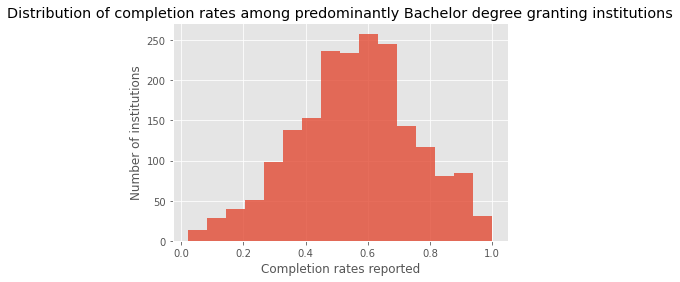

In [8]:
plt.hist(df_latest['completion_rate'],bins=16, alpha=0.8)
plt.xlabel('Completion rates reported')
plt.ylabel('Number of institutions')
plt.title('Distribution of completion rates among predominantly Bachelor degree granting institutions')
plt.show()

It appears that the completion rates are fairly normally distributed, but slightly left scewed. It is worth seeing how the distribution differs for private vs public institutions.

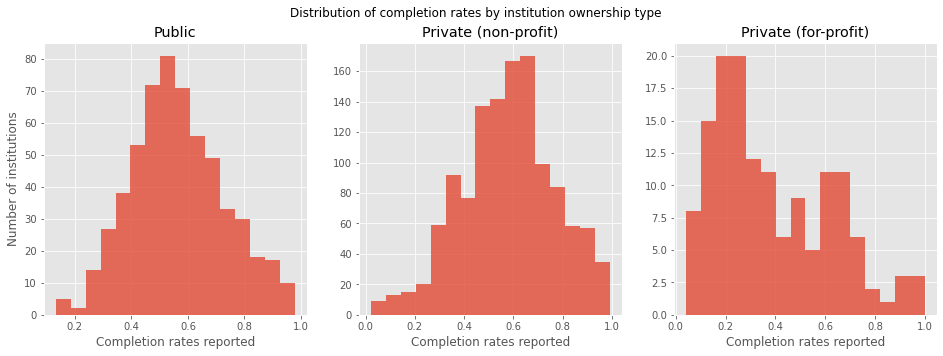

In [9]:
fig, ax = plt.subplots(1,3,figsize=(16,5))
for i in range(3):
    ax[i].hist(df_latest[df_latest['school.ownership']==i+1]['completion_rate'],bins=16,alpha=0.8)
    ax[i].set_xlabel('Completion rates reported')
ax[0].set_ylabel('Number of institutions')
ax[0].set_title('Public')
ax[1].set_title('Private (non-profit)')
ax[2].set_title('Private (for-profit)')
fig.suptitle('Distribution of completion rates by institution ownership type')
plt.show()

The distributions do differ, which indicates that the ownership classification of a university will be an of-use feature. For example, public institutions seem to be perfectly distributed at mean 50% completion rate, while private non-profit institutions slightly favor higher completion rates. Private for-profit institutions are slanted toward lower completion rates, which is initially surprising to me, though they appear to be slightly bimodal and have a second peak at around 70% completion. Since the distributions differ dramatically in sample size, it might be beneficial to view this data as a swarm plot.

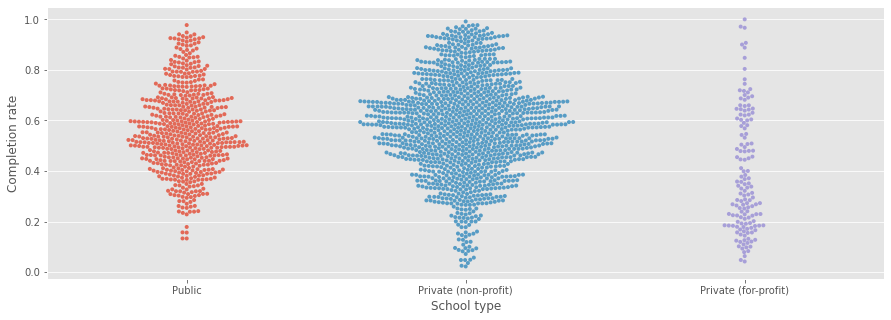

In [10]:
ax = plt.figure(figsize=(15,5))
ax = sns.swarmplot(data=df_latest,x='school.ownership',y='completion_rate',size=4,alpha=0.8)
plt.xlabel('School type')
plt.ylabel('Completion rate')
plt.xticks([0,1,2],['Public','Private (non-profit)','Private (for-profit)'])
plt.show()

Let's see the distributions by region. We will explore differences by state soon enough, but for now regions are more manageable as there are only 10 distince regions.

[5 8 6 7 0 1 2 3 4 9]


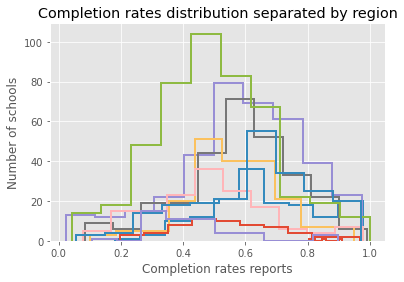

In [11]:
# There are 10 unique region_ids
print(df_latest['school.region_id'].unique())
for i in range(10):
    plt.hist(df_latest[df_latest['school.region_id']==i]['completion_rate'],histtype='step',linewidth=2)
plt.xlabel('Completion rates reports')
plt.ylabel('Number of schools')
plt.title('Completion rates distribution separated by region')
plt.show()

And by locale...

[12 31 13 23 43 21 33 11 32 22 41 42]


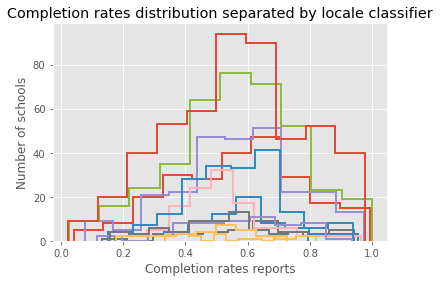

In [12]:
print(df_latest['school.locale'].unique())
for i in df_latest['school.locale'].unique():
    plt.hist(df_latest[df_latest['school.locale']==i]['completion_rate'],histtype='step',linewidth=2)
plt.xlabel('Completion rates reports')
plt.ylabel('Number of schools')
plt.title('Completion rates distribution separated by locale classifier')
plt.show()

So, while it is clear that the distributions vary, it is difficult to observe much from the color of these plots. Let's see if any patterns emerge in our more readable swarm plots if we color code for region and locale.

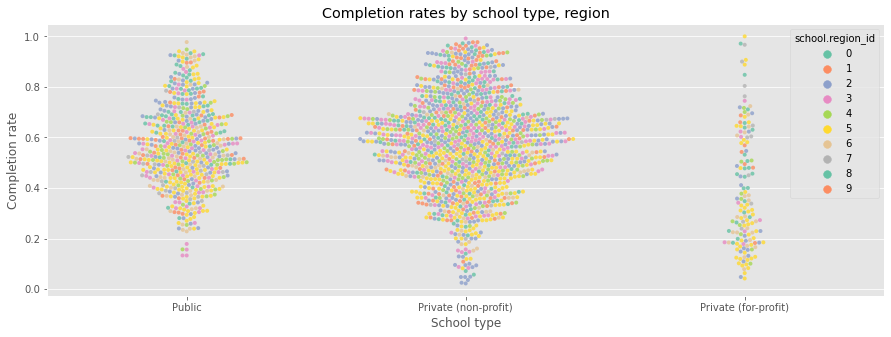

In [13]:
ax = plt.figure(figsize=(15,5))
ax = sns.swarmplot(data=df_latest,x='school.ownership',y='completion_rate',hue='school.region_id',size=4,alpha=0.8,palette='Set2')
plt.xlabel('School type')
plt.ylabel('Completion rate')
plt.xticks([0,1,2],['Public','Private (non-profit)','Private (for-profit)'])
plt.title('Completion rates by school type, region')
plt.show()

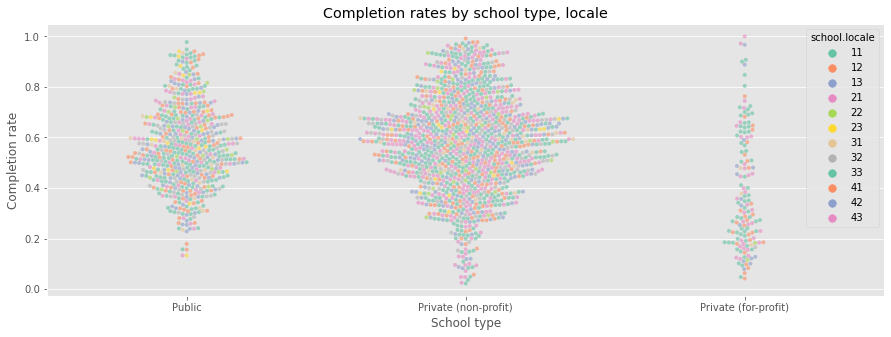

In [14]:
ax = plt.figure(figsize=(15,5))
ax = sns.swarmplot(data=df_latest,x='school.ownership',y='completion_rate',hue='school.locale',size=4,alpha=0.6,palette='Set2')
plt.xlabel('School type')
plt.ylabel('Completion rate')
plt.xticks([0,1,2],['Public','Private (non-profit)','Private (for-profit)'])
plt.title('Completion rates by school type, locale')
plt.show()

There are ultimately too many categories to draw meaningful insight here. Before continuing, it will be necessary to explore the columns for which values are missing, before returning to the Data Wrangling and completing high level aggregations when poosible. Ultimately, however, due to the high number of dimensions, algorithmic dimensionality reduction will be necessary.